In [164]:
import pickle
import h5py
import numpy as np

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os
import sys
sys.path.append("../")
from misc.AGAImage import AGAImage
from misc.tools import compute_SUNRGBD_attributes

from PIL import Image, ImageFont, ImageDraw

image_folder = '/scratch2/rkwitt/data/SUNRGBD/images/'

In [205]:
with open('../SUNRGBD_meta.pkl','r') as fid:
    meta = pickle.load(fid)
with open('../SUNRGBD_objects.pkl','r') as fid:
    objects = pickle.load(fid)

In [263]:
def visualize_SUNRGBD(meta, image_folder, image_id, data_postfix=None):
        
    img_file = os.path.join(
        image_folder, 
        'image_%.5d.jpg' % image_id)

    data = None
    if not data_postfix is None:
        data_file = os.path.join(
            image_folder, 
            'image_%.5d%s' % (image_id, data_postfix))

        with open(data_file, 'r') as fid:
            data = pickle.load(fid)
            
    img_idx = image_id-1
    
    im = np.array(Image.open(img_file), dtype=np.uint8)
    
    fig,ax = plt.subplots(1)
    
    bbs = meta[img_idx].get_gtBB2D() 

    for i in np.arange(bbs.shape[0]):
        x0 = bbs[i,0]
        y0 = bbs[i,1]
        wx = bbs[i,2]
        wy = bbs[i,3]
        
        attributes = compute_SUNRGBD_attributes(meta[img_idx], i)
        
        rect = patches.Rectangle(
            (x0, y0), wx, wy, 
            linewidth=3, 
            edgecolor='r',
            facecolor='none')
        
        ax.add_patch(rect)
        ax.text(x0, y0, '%s [%.2f, %.2f deg]' % (
            attributes['cname'], 
            attributes['depth'],
            np.rad2deg(attributes['angle'])) ,
                fontsize=8,bbox={'facecolor':'red', 'alpha':0.8, 'pad':1})
    
    
    if not data is None:
        if data['is_valid']:
            for cnt in np.arange(data['CNN_activations'].shape[0]):
                x0 = data['det_box'][cnt,0]
                y0 = data['det_box'][cnt,1]
                wx = data['det_box'][cnt,2]
                wy = data['det_box'][cnt,3]
                
                rect = patches.Rectangle(
                    (x0, y0), wx, wy, 
                    linewidth=3, 
                    edgecolor='blue',
                    facecolor='none')
                ax.add_patch(rect)
                ax.text(x0, y0, '%s [%.2f, %.2f deg]' % (
                    data['attributes'][cnt]['cname'],
                    data['attributes'][cnt]['depth'], 
                    np.rad2deg(data['attributes'][cnt]['angle'])) ,
                    fontsize=8,color='white',bbox={'facecolor':'blue', 'alpha':0.8, 'pad':1})
    
    
    ax.imshow(im)
    plt.show()

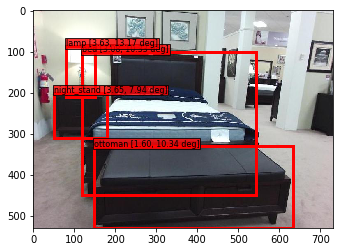

In [264]:
visualize_SUNRGBD(meta, image_folder, 4)